# Algorithm Questions

1. How does regularization (L1 and L2) help in preventing overfitting?

Regularization helps prevent overfitting by adding a penalty term to the loss function, which discourages the model from fitting the noise in the training data. This penalty limits the magnitude of the model's parameters (weights), effectively simplifying the model. Here's how L1 and L2 regularization work:

**L1 Regularization (Lasso)**:
- Adds a penalty equal to the absolute sum of the weights: $ \lambda \sum |w_i| $

- Encourages sparsity by forcing some weights to become exactly zero, effectively removing less important features from the model.
- Useful for feature selection since it can zero out irrelevant or redundant features.

**L2 Regularization (Ridge)**:
- Adds a penalty equal to the square of the weights: $ \lambda \sum w_i^2 $.
- Shrinks weights towards zero without making them exactly zero, which reduces the model's complexity and prevents it from being overly sensitive to noise.
- Works well when all features contribute, and none can be entirely ignored.

2. Why is feature scaling important in gradient descent?

Feature scaling is crucial in gradient descent for the following reasons:

1. Faster Convergence:

  - Gradient descent updates weights by scaling gradients with the learning rate. - If features have very different ranges, the cost function becomes skewed, leading to zig-zag paths during optimization.
  - Scaling ensures the cost function contours are more circular, allowing smoother and faster convergence.

2. Prevents Dominance by Larger Features:

    - Without scaling, features with larger ranges dominate the gradient, overshadowing smaller-scaled features, making the model less effective.
3. Better Performance Across Algorithms:

    - Feature scaling ensures algorithms like stochastic gradient descent (SGD) work optimally as they rely on uniform magnitudes of features for consistent updates.

**Methods of Scaling**:
- Standardization: Centers features around zero with unit variance:
$$x' = \frac{x - \mu}{\sigma}$$

- Normalization: Rescales features to a fixed range, often [0, 1]:
$$x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$$


# Problem Solving

1. Given a dataset with missing values, how would you handle them before training an ML model?


To handle missing values before training a machine learning model:

1. Remove Missing Data:

  - Remove rows with missing values if the dataset is large.
  - Remove columns with many missing values if they don’t contribute much.

2. Impute Missing Values:

  - Mean/Median: For numerical data.
  - Mode: For categorical data.
  - KNN: Impute based on similar rows.
  - Regression: Predict missing values using other features.
  - Multivariate Imputation: Advanced methods like MICE.

3. Use Special Categories/Values:

  - For categorical data, create a new category (e.g., "Unknown").
  - For numerical data, impute with a special value (e.g., -999).

4. Use Algorithms that Handle Missing Data:

  - Decision trees, Random Forest, XGBoost, and LightGBM can handle missing values internally.

5. Analyze Missing Data Distribution:

  - Understand if data is Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR).

Choosing the Method:

  - Imputation is preferred when removing data results in loss of valuable information.
  - Removal is fine when missing data is minimal.

In [5]:
from sklearn.impute import SimpleImputer
import pandas as pd

# New example dataset with missing values
data = pd.DataFrame({
    'height': [160, 170, None, 180, 175],
    'weight': [60, 70, 80, None, 65],

})

# Display the dataset with missing values
print("Original Dataset:")
print(data)

# Impute missing numerical values (e.g., 'height' and 'weight') with the median
imputer_num = SimpleImputer(strategy='median')
data[['height', 'weight']] = imputer_num.fit_transform(data[['height', 'weight']])

# Display the dataset after imputation
print("\nDataset After Imputation:")
print(data)



Original Dataset:
   height  weight
0   160.0    60.0
1   170.0    70.0
2     NaN    80.0
3   180.0     NaN
4   175.0    65.0

Dataset After Imputation:
   height  weight
0   160.0    60.0
1   170.0    70.0
2   172.5    80.0
3   180.0    67.5
4   175.0    65.0


2. Design a pipeline for building a classification model. Include steps for data preprocessing.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset (e.g., Iris dataset for demonstration)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns (assuming categorical data)
# For this example, we assume there are no categorical features, but in real-world scenarios, you'd define them.
num_features = X.select_dtypes(include=['float64']).columns.tolist()
cat_features = []  # In this case, there are no categorical features

# Create a preprocessing pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing with the mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Create a preprocessing pipeline for categorical features (if applicable)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical features
])

# Combine preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)  # Apply only if there are categorical features
    ]
)

# Create a full pipeline that combines preprocessing and model training
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', RandomForestClassifier())  # Use RandomForest as a classifier
])

# Train the model using the pipeline
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Coding

1.Write a Python script to implement a decision tree classifier using Scikit-learn.

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



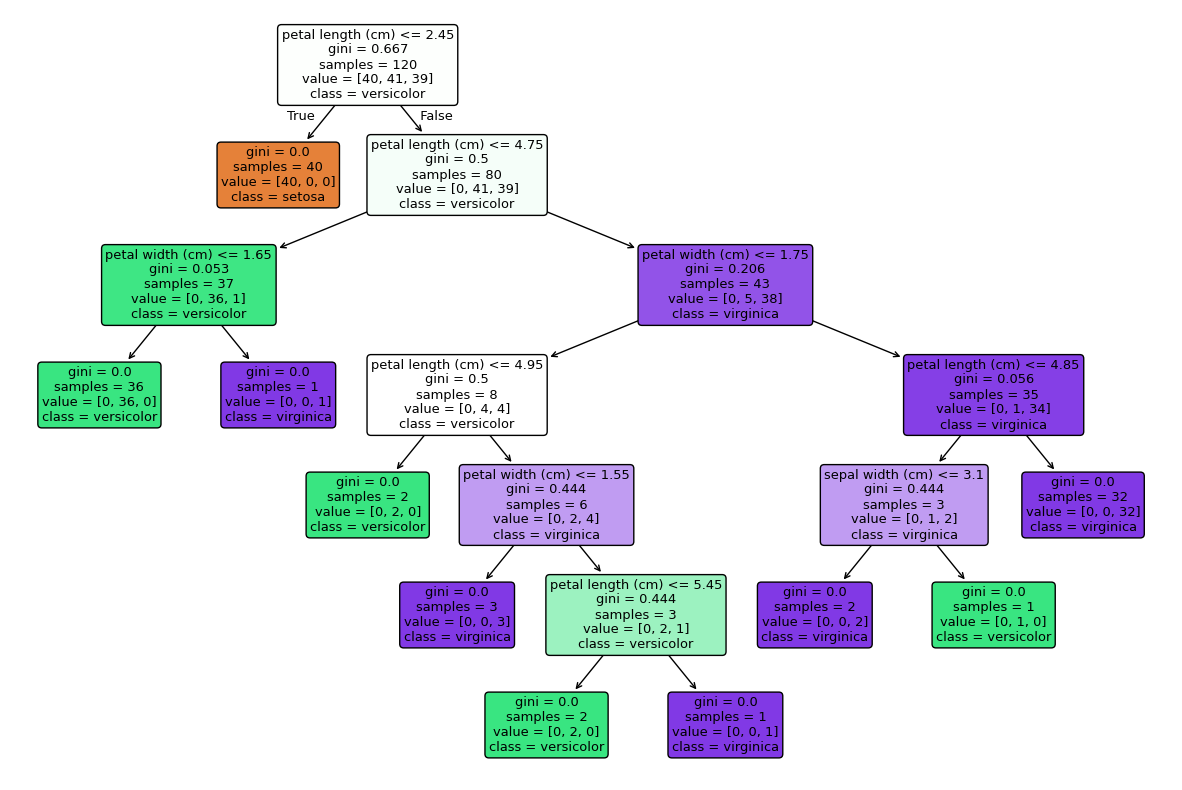

In [7]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset (you can replace this with your own dataset)
data = load_iris()

# Create a DataFrame for better visualization (optional)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, visualize the decision tree (requires matplotlib and graphviz)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the trained decision tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=data.target_names, rounded=True)
plt.show()


2.Given a dataset, write code to split the data into training and testing sets using an 80-20 split.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example dataset
# This can be replaced with your own dataset, for example, by loading a CSV file
data = pd.DataFrame({
    'feature1': [0.1, 0.2, 0.3, 0.4, 0.5],
    'feature2': [1, 2, 3, 4, 5],
    'label': [0, 1, 0, 1, 0]
})

# Define features (X) and target (y)
X = data.drop('label', axis=1)  # Features
y = data['label']               # Target

# Split the dataset into training and testing sets with an 80-20 split
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split data
print("Training Set:")
print("Features:\n", X_train)
print("Labels:\n", y_train)
print("\nTesting Set:")
print("Features:\n", X_test)
print("Labels:\n", y_test)


Training Set:
Features:
    feature1  feature2
4       0.5         5
2       0.3         3
0       0.1         1
3       0.4         4
Labels:
 4    0
2    0
0    0
3    1
Name: label, dtype: int64

Testing Set:
Features:
    feature1  feature2
1       0.2         2
Labels:
 1    1
Name: label, dtype: int64


# Case Study

**A company wants to predict employee attrition. What kind of ML problem is this? Which algorithms would you choose and why?**

Predicting employee attrition (whether an employee will leave the company or not) is a supervised classification problem in machine learning. In this case, the target variable is categorical (e.g., "attrition" with values yes/no, or 1/0), where we are trying to predict the likelihood of an employee leaving based on various features such as demographic data, job satisfaction, performance metrics, etc.

**Type of Problem: Supervised Classification**

- Supervised learning: You have labeled data (historical data on employees, some of whom stayed and others who left).
- Classification: The output is categorical (binary classification: will leave or will stay).

**Possible Algorithms**:
1. Logistic Regression:

  - Why: Logistic regression is a simple and interpretable model for binary classification. It's useful when the relationship between the features and the target is approximately linear. It works well if the dataset is not too complex or large.
  - Pros: Easy to interpret, fast, and works well with smaller datasets.
  - Cons: May not capture complex relationships, prone to underfitting on nonlinear data.
2. Decision Trees:

  - Why: Decision trees split data based on features to make predictions. They are highly interpretable and can handle both numerical and categorical features. They can also model non-linear relationships.
  - Pros: Easy to interpret, can capture non-linear relationships.
  - Cons: Prone to overfitting, especially with deep trees.
3. Random Forest (Ensemble of Decision Trees):

  - Why: Random forests overcome the overfitting problem of decision trees by averaging the predictions from multiple trees. It works well for complex datasets with many features and interactions.
  - Pros: Robust, handles missing data, reduces overfitting, handles both categorical and numerical data.
  - Cons: Less interpretable than a single decision tree, computationally more expensive.
4. Gradient Boosting Machines (GBM) / XGBoost / LightGBM:

  - Why: These are ensemble methods that build a series of trees, where each subsequent tree corrects the errors made by previous ones. These algorithms perform well on structured/tabular data and have excellent predictive performance.
  - Pros: High accuracy, handles complex datasets with many features, good for imbalanced datasets.
  - Cons: Requires more tuning, computationally expensive, harder to interpret.
5. Support Vector Machines (SVM):

  - Why: SVMs are effective in high-dimensional spaces and can model complex boundaries between classes (e.g., linear or non-linear). They are useful for small to medium-sized datasets.
  - Pros: Good for high-dimensional data, robust to overfitting.
  - Cons: Computationally expensive with large datasets, difficult to tune (especially with non-linear kernels).
6. K-Nearest Neighbors (KNN):

  - Why: KNN is a simple algorithm that assigns the majority class of the nearest data points. It works well if the dataset is not too large and the decision boundary is not too complex.
  - Pros: Simple, non-parametric, and easy to understand.
  - Cons: Slow with large datasets, sensitive to irrelevant features and the choice of k.

**Suggested Algorithm for Employee Attrition Prediction**:

- Random Forest or Gradient Boosting (XGBoost / LightGBM) would likely be the most appropriate for this task due to:
  - Their ability to handle both numerical and categorical features without the need for extensive preprocessing (though you may still need to encode categorical variables).
  - Their high accuracy, especially when dealing with complex, high-dimensional data.
  - The ability to handle imbalanced datasets (where the number of employees who leave is much smaller than those who stay).

  **Why Random Forest / XGBoost / LightGBM?**

    - Random Forest: It’s a great all-around model, not very sensitive to the data distribution, and relatively robust to overfitting when tuned properly.
    - XGBoost / LightGBM: These algorithms are often the top performers in structured data tasks, including classification problems like employee attrition. They provide high accuracy and are more efficient at handling large datasets, complex interactions between features, and missing data.

**Evaluation Metrics:**

Since this is a classification problem with potentially imbalanced classes (if most employees stay and few leave), the following evaluation metrics would be important:
- Accuracy (overall correctness)
- Precision and Recall (especially recall for predicting employees who will leave)
- F1-Score (balances precision and recall)
- AUC-ROC (Area Under the Receiver Operating Characteristic curve)

**Example Approach for Employee Attrition Prediction:**

1. Data Collection: Collect data on employee demographics, job satisfaction, performance ratings, compensation, work-life balance, etc.
2. Data Preprocessing:
  - Handle missing values (e.g., impute or remove missing data).
  - Encode categorical variables (e.g., using one-hot encoding or label encoding).
  - Scale numerical features (if necessary).
3. Feature Engineering: Create new features that may help predict attrition (e.g., tenure, age, work environment, etc.).
4. Model Selection: Start with Random Forest or Gradient Boosting (e.g., XGBoost).
5. Hyperparameter Tuning: Use cross-validation and grid search to optimize hyperparameters.
6. Model Evaluation: Evaluate model performance using classification metrics such as accuracy, precision, recall, and F1-score.
7. Model Interpretation: Use feature importance to understand what factors influence attrition most (e.g., high workload, low job satisfaction).

**Conclusion**:
- Problem Type: Supervised classification (binary classification: attrition or not).
- Recommended Algorithms: Random Forest, XGBoost, or LightGBM for their high accuracy, ability to handle complex datasets, and robustness to overfitting.
- Evaluation Metrics: Focus on precision, recall, F1-score, and AUC-ROC, especially if the dataset is imbalanced.
